In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from sklearn import linear_model

In [2]:
df = pd.read_csv("../traces/benchmarks/20230226_5_first_benchmarks.csv")

# While language

In [3]:
df_while = df[df['benchmark_name'].str.startswith("while")]

In [4]:
df_while["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]

/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [5]:
df_while

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
15,while_fib_program_100_staged,0.988185,1.510127e+09,-4.409304e+07,4.320540e+07,1.0,4.564599e+08,-7.152557e-07,7.748604e-07,1.000000,...,0.051680,0.999992,82.903333,-0.069201,0.079404,NaN,0.0,0.0,0.0,100
16,while_fib_program_50_staged,0.938257,7.730504e+08,-6.264354e+07,6.331476e+07,1.0,2.270494e+08,-2.682209e-07,4.768372e-07,1.000000,...,0.062575,0.999929,43.480000,-0.140403,0.107467,NaN,0.0,0.0,0.0,50
17,while_fib_program_20_staged,0.888138,3.126043e+08,-3.884205e+07,3.506064e+07,1.0,8.945276e+07,-1.341105e-07,1.490116e-07,1.000000,...,0.025026,0.999922,17.878889,-0.039130,0.041801,NaN,0.0,0.0,0.0,20
18,while_fib_program_10_staged,0.825359,1.528212e+08,-2.641902e+07,2.176148e+07,1.0,4.360329e+07,-6.705523e-08,7.450581e-08,0.999998,...,0.018045,0.999906,9.495556,-0.024388,0.026096,NaN,0.0,0.0,0.0,10
19,while_fib_program_5_staged,0.638991,6.243991e+07,-1.004788e+07,1.318798e+07,1.0,2.068248e+07,-3.352761e-08,2.980232e-08,0.999996,...,0.029692,0.998890,4.596667,-0.050781,0.039466,NaN,0.0,0.0,0.0,5
20,while_fib_program_2_staged,0.896391,2.970896e+07,-2.523492e+06,3.357500e+06,1.0,6.932129e+06,-9.313226e-09,1.210719e-08,0.999998,...,0.038418,0.997125,1.625556,-0.024042,0.021742,NaN,0.0,0.0,0.0,2
21,while_fib_program_1_staged,0.874061,4.929883e+06,-8.217909e+05,6.368842e+05,1.0,1.160801e+06,-1.629815e-09,1.862645e-09,0.999927,...,0.029722,0.873737,0.244444,-0.028425,0.030953,NaN,0.0,0.0,0.0,1
22,while_fib_program_compile,0.784505,1.744336e+08,-2.640488e+07,2.604730e+07,1.0,4.844803e+07,-7.450581e-08,8.940697e-08,1.000000,...,0.073168,0.998416,12.500000,-0.127871,0.149513,NaN,0.0,0.0,0.0,0
23,while_fib_program_100_run,0.998424,7.904804e+09,-1.007440e+08,1.004028e+08,1.0,2.285558e+09,-3.337860e-06,4.768372e-06,1.000000,...,0.562740,0.999822,555.603333,-0.477160,1.034348,NaN,0.0,0.0,0.0,100
24,while_fib_program_50_run,0.998127,3.984484e+09,-4.077164e+07,5.055491e+07,1.0,1.138226e+09,-1.430511e-06,2.384186e-06,1.000000,...,0.171405,0.999990,302.357778,-0.244021,0.316938,NaN,0.0,0.0,0.0,50


In [207]:
def plot_one(ax, to_plot, color, ecolor, fill_color, label, fmt="x--", fill_between=True):
    x = to_plot['bench_x']
    y = to_plot['time_per_run_mean']
    lo_err = to_plot['time_per_run_abs_lo_diff']
    hi_err = to_plot['time_per_run_abs_hi_diff']
    error = [-lo_err, hi_err]
    if fill_between:
        ax.fill_between(x, y + lo_err, y + hi_err, color=fill_color)
    ax.errorbar(x, y, yerr=error, fmt=fmt, color=color, ecolor=ecolor, label=label)

def plot_info_for_axs(df, title, axs, linreg = True):
    # Setup
    # Assumes existence of bench_x column
    # fig, axs = plt.subplots(3, 1, figsize=(15, 20))

    staged = df[df['benchmark_name'].str.endswith('staged')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    run = df[df['benchmark_name'].str.endswith('run')][['benchmark_name', 'bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
    peval = df[df['benchmark_name'].str.endswith('compile')][['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']].iloc[0]

    # Initial analysis
    plot_one(axs[0], staged, "blue", "black", "#e3e1de", "Compiled")
    plot_one(axs[0], run, "orange", "black", "#e3e1de", "Interpreted")
    axs[0].legend()
    axs[0].set_xlabel("Dynamic Input x")
    axs[0].set_ylabel("Runtime (ns)")
    # plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
    axs[0].set_title(f"{title}: Time/run")

    # Ratio

    joined = staged.join(run.set_index('bench_x'), on="bench_x", lsuffix="_staged", rsuffix="_run")
    joined = joined[joined['benchmark_name_staged'].str[:-6] == joined['benchmark_name_run'].str[:-3]]

    axs[1].plot(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged'], "x--")
    for i,j in zip(joined['bench_x'], joined['time_per_run_mean_run']/joined['time_per_run_mean_staged']):
        axs[1].annotate(str(round(j, 2)),xy=(i,j))

    axs[1].set_xlabel("Dynamic Input x")
    axs[1].set_ylabel("Runtime ratio")
    axs[1].set_title(f"{title}: Ratio of speedup: $t(p, x)/t_p(x)$")

    # Compile + run VS just run

    new_staged = (peval + staged).append(peval)
    new_run = run # pd.concat([run, pd.DataFrame([[0, 0, 0, 0]], columns=['bench_x', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff'])]) 

    if linreg:
        plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.', fill_between=False)
        plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.', fill_between=False)

        model_staged = linear_model.LinearRegression()
        model_staged.fit(np.array(new_staged['bench_x']).reshape(-1, 1), new_staged['time_per_run_mean'])
        model_run = linear_model.LinearRegression()
        model_run.fit(np.array(new_run['bench_x']).reshape(-1, 1), new_run['time_per_run_mean'])

        X = np.linspace(0, 100).reshape(-1, 1)
        y_staged = model_staged.predict(X)
        y_run = model_run.predict(X)
        axs[2].plot(X, y_staged, "-", color="cyan", label="Linear model for the combined run time of the staged version")
        axs[2].plot(X, y_run, "-", color="#f7b713", label="Linear model for the run time of the non staged version")

        x_intersection = (model_run.intercept_-model_staged.intercept_) / (model_staged.coef_[0] - model_run.coef_[0])
        y_intersection = model_staged.predict([[x_intersection]])[0]
        axs[2].plot(x_intersection, y_intersection, "o", color="red", label="intersection")
        axs[2].annotate(str((round(x_intersection, 2), round(y_intersection, 2))), xy=(x_intersection, y_intersection))
    else:
        plot_one(axs[2], new_staged, "blue", "black", "#e3e1de", "Combined run time of the staged version", fmt='.--', fill_between=False)
        plot_one(axs[2], new_run, "orange", "black", "#e3e1de", "Combined run time of the non staged version", fmt='.--', fill_between=False)
    axs[2].legend()
    axs[2].set_xlabel("Dynamic Input x")
    axs[2].set_ylabel("Runtime (ns)")
    axs[2].set_title(f"{title}: Time/run: Interpreted VS Compilation + Eval")

    # plt.show()

def plot_info_for(df, title, linreg=True):
    fig, axs = plt.subplots(3, 1, figsize=(15, 20))
    plot_info_for_axs(df, title, axs, linreg)
    plt.show()


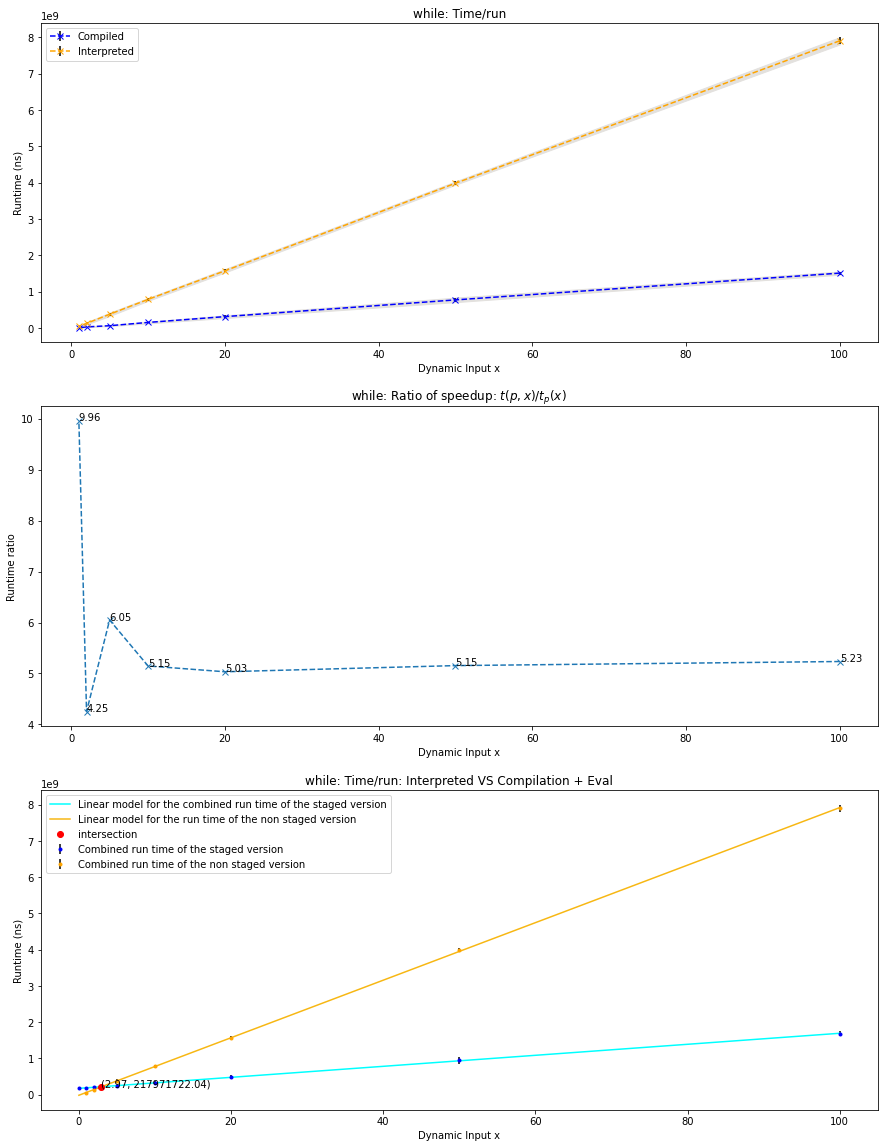

In [208]:
plot_info_for(df_while, "while")

## Interpretation

Got some really nice results here. `fib x` happens to be linear wrt $x$, so two lines is indeed what we get.
Clearly the speedup ration converges to around 5.

# Flowchart

In [179]:
df_flowchart = df[df['benchmark_name'].str.startswith("flowchart")]
df_flowchart["bench_x"] = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]
df_flowchart = df_flowchart.fillna(0)

/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


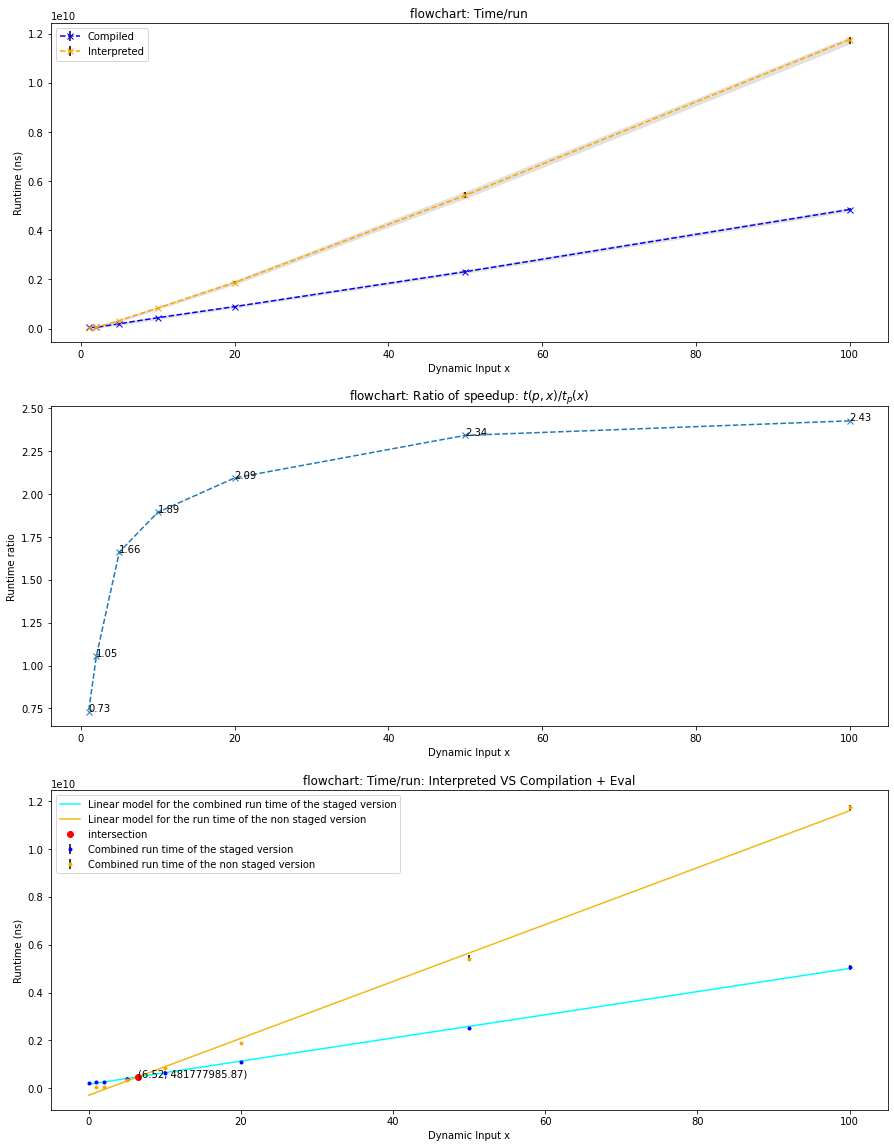

In [180]:
plot_info_for(df_flowchart, "flowchart")

## Interpretation

Just like the above but not sure that this convergence has reached its converging point

# Pow

*We currently have some problem with the data.*

It doesn't look like it is growing! I should probably get data with bigger number *lengths*, because unfortunately cost of multiplication is $O(log(x))$ where $x$ is the second input.

We want to collect more data!

In other words, the result I got here is inconclusive.

In [181]:
df_pow = df[df['benchmark_name'].str.startswith("pow")]
bench_xs = [100, 50, 20, 10, 5, 2, 1] + [0] + [100, 50, 20, 10, 5, 2, 1]
bench_ns = [2, 5, 10, 50]

In [182]:
df_pow

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
100,pow_50_100_staged,0.874673,1.536149e+05,-6979.244418,6351.662213,1.0,58516.0,-2.255547e-10,8.003553e-11,0.995443,...,-0.000821,0.000797,0.006089,0.000118,-0.000118,0.000271,NaN,0.0,0.0,0.0
101,pow_50_50_staged,0.851705,1.465031e+05,-6826.110295,6709.000527,1.0,58466.0,-2.255547e-10,8.731149e-11,0.991843,...,-0.000884,0.000907,0.005852,0.000117,-0.000117,0.000266,NaN,0.0,0.0,0.0
102,pow_50_20_staged,0.792022,1.470201e+05,-7337.295830,8251.177161,1.0,58466.0,-2.255547e-10,8.003553e-11,0.991999,...,-0.000904,0.000876,0.005618,0.000116,-0.000116,0.000256,NaN,0.0,0.0,0.0
103,pow_50_10_staged,0.768490,1.238724e+05,-9829.080723,9619.238720,1.0,58466.0,-2.182787e-10,7.275958e-11,0.992373,...,-0.000869,0.000926,0.005386,0.000115,-0.000115,0.000252,NaN,0.0,0.0,0.0
104,pow_50_5_staged,0.962060,7.444077e+04,-1609.891658,2293.518936,1.0,58466.0,-2.255547e-10,8.003553e-11,0.992334,...,-0.000894,0.000909,0.005156,0.000114,-0.000114,0.000265,NaN,0.0,0.0,0.0
105,pow_50_2_staged,0.992019,7.374504e+04,-679.352059,758.801891,1.0,58466.0,-2.182787e-10,8.003553e-11,0.992309,...,-0.000875,0.000861,0.004928,0.000113,-0.000113,0.000252,NaN,0.0,0.0,0.0
106,pow_50_1_staged,0.612234,1.238002e+05,-9092.414978,9582.407384,1.0,58466.0,-2.110028e-10,8.003553e-11,0.992094,...,-0.000876,0.000860,0.004928,0.000113,-0.000113,0.000251,NaN,0.0,0.0,0.0
107,pow_50_compile,0.808321,1.368336e+07,-669519.266588,655799.784230,1.0,5121016.0,-1.955777e-08,6.519258e-09,0.999999,...,-0.000943,0.000895,0.993463,0.122057,-0.000871,0.000819,NaN,0.0,0.0,0.0
108,pow_50_100_run,0.815896,8.061137e+06,-424775.303074,412221.333720,1.0,2675801.0,-1.071021e-08,2.793968e-09,0.999997,...,-0.001027,0.000977,0.992306,0.111948,-0.000807,0.000811,NaN,0.0,0.0,0.0
109,pow_50_50_run,0.775159,7.745944e+06,-470676.358586,475756.006405,1.0,2675801.0,-1.117587e-08,3.259629e-09,0.999998,...,-0.000951,0.001022,0.991554,0.113867,-0.000941,0.000893,NaN,0.0,0.0,0.0


In [195]:
df_pow[df_pow['benchmark_name'].str.startswith("pow_5_")]

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
130,pow_5_100_staged,0.865648,1.962974e+04,-744.306933,731.084447,1.0,6676.0,-2.455636e-11,1.000444e-11,0.698316,...,-0.000862,0.000872,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
131,pow_5_50_staged,0.813112,2.062999e+04,-1009.334965,1103.103087,1.0,6671.0,-2.273737e-11,1.273293e-11,0.756114,...,-0.000810,0.000825,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
132,pow_5_20_staged,0.916488,1.852389e+04,-533.230607,557.248939,1.0,6671.0,-2.273737e-11,1.273293e-11,0.756114,...,-0.000826,0.000868,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
133,pow_5_10_staged,0.905141,1.995008e+04,-729.276852,762.116506,1.0,6671.0,-2.273737e-11,1.091394e-11,0.756114,...,-0.000888,0.000829,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
134,pow_5_5_staged,0.778205,1.872360e+04,-705.504715,840.782411,1.0,6671.0,-2.273737e-11,1.182343e-11,0.756114,...,-0.000826,0.000842,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
135,pow_5_2_staged,0.762194,1.893294e+04,-1099.887277,1166.773552,1.0,6671.0,-2.364686e-11,1.182343e-11,0.756114,...,-0.000904,0.000899,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
136,pow_5_1_staged,0.916785,1.792024e+04,-539.285126,547.365333,1.0,6671.0,-2.273737e-11,1.273293e-11,0.756114,...,-0.000816,0.000872,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0
137,pow_5_compile,0.604241,1.351599e+06,-105113.652345,107408.979170,1.0,397006.0,-1.396984e-09,6.402843e-10,0.999993,...,-0.000949,0.000938,0.858353,0.025425,-0.000909,0.000897,NaN,0.0,0.0,0.0
138,pow_5_100_run,0.522716,1.009155e+06,-83995.338754,87182.322570,1.0,315776.0,-1.396984e-09,1.746230e-10,0.999991,...,-0.000701,0.000713,0.869400,0.025467,-0.000832,0.000839,NaN,0.0,0.0,0.0
139,pow_5_50_run,0.964395,1.312202e+06,-25601.678837,24737.159239,1.0,315776.0,-1.513399e-09,1.746230e-10,0.999989,...,-0.000756,0.000752,0.875914,0.026248,-0.000834,0.000849,NaN,0.0,0.0,0.0


/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


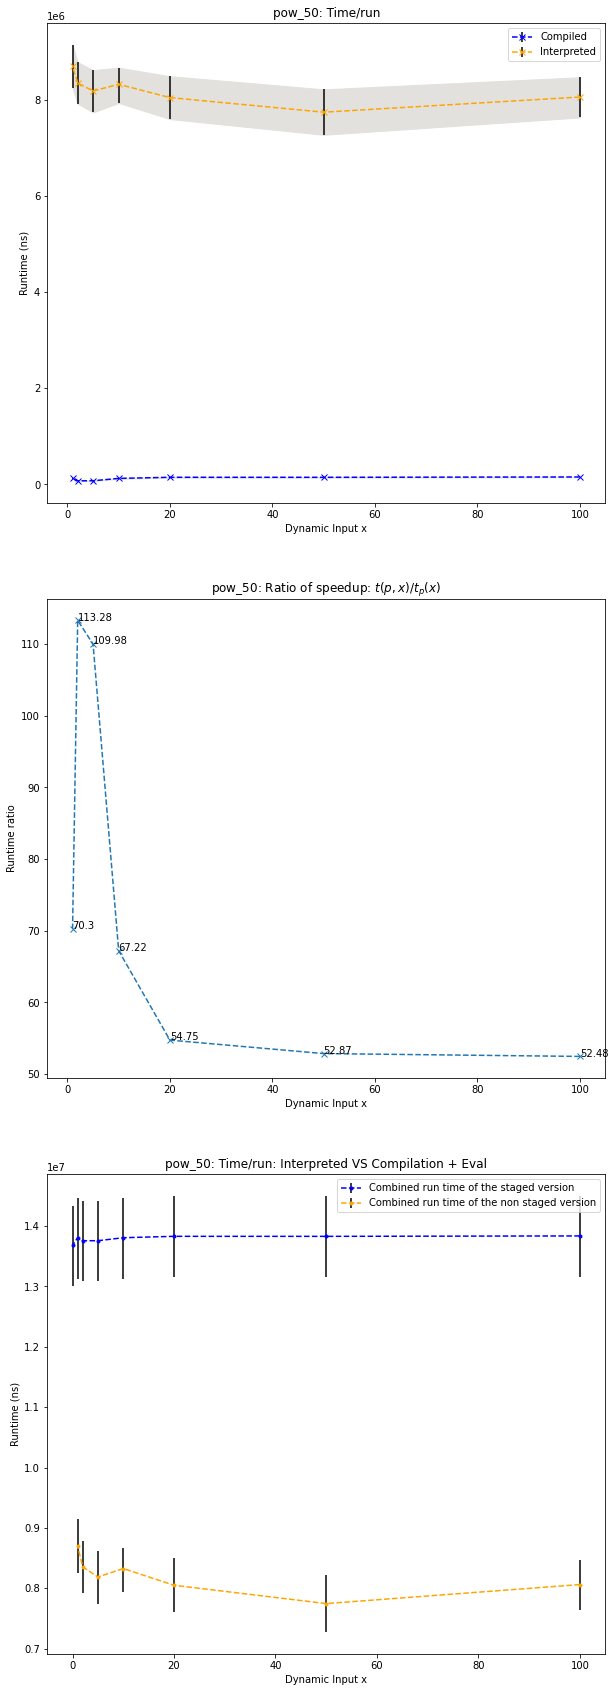

In [194]:
fig, axs = plt.subplots(3, 1, figsize=(10, 30))
df_pow_n = df_pow[df_pow["benchmark_name"].str.startswith(f"pow_{50}_")]
df_pow_n["bench_x"] = bench_xs
df_pow_n.fillna(0)
plot_info_for_axs(df=df_pow_n, title=f"pow_{50}", axs=axs, linreg=False)

In [184]:
df_pow_n

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
115,pow_10_100_staged,0.792257,3.363181e+04,-2194.960710,2371.823055,1.0,12436.0,-5.275069e-11,1.091394e-11,0.814689,...,0.000809,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,100
116,pow_10_50_staged,0.774385,2.649757e+04,-1173.953099,1298.306729,1.0,12426.0,-4.183676e-11,2.182787e-11,0.780298,...,0.000885,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,50
117,pow_10_20_staged,0.866962,3.952798e+04,-1574.569494,1692.122945,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000866,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,20
118,pow_10_10_staged,0.865828,3.083012e+04,-1534.581259,1736.829221,1.0,12426.0,-4.365575e-11,2.000888e-11,0.780298,...,0.000866,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,10
119,pow_10_5_staged,0.863367,3.011611e+04,-1382.182180,1375.740696,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000846,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,5
120,pow_10_2_staged,0.723929,3.468589e+04,-2500.169497,2790.530237,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000859,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,2
121,pow_10_1_staged,0.825868,3.226346e+04,-1799.482185,1691.985702,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000825,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,1
122,pow_10_compile,0.742212,2.356673e+06,-155239.281086,162499.461287,1.0,768196.0,-2.793968e-09,1.047738e-09,0.999970,...,0.000940,0.919805,0.032542,-0.000794,0.000814,NaN,0.0,0.0,0.0,0
123,pow_10_100_run,0.617225,1.731615e+06,-134433.610814,136892.351725,1.0,578001.0,-2.561137e-09,4.656613e-10,0.999990,...,0.000846,0.911623,0.031842,-0.000864,0.000833,NaN,0.0,0.0,0.0,100
124,pow_10_50_run,0.605768,1.715378e+06,-139276.470702,145486.519566,1.0,578001.0,-2.561137e-09,4.656613e-10,0.999994,...,0.000876,0.914366,0.032355,-0.000836,0.000827,NaN,0.0,0.0,0.0,50


In [185]:
df_pow_n

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,bench_x
115,pow_10_100_staged,0.792257,3.363181e+04,-2194.960710,2371.823055,1.0,12436.0,-5.275069e-11,1.091394e-11,0.814689,...,0.000809,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,100
116,pow_10_50_staged,0.774385,2.649757e+04,-1173.953099,1298.306729,1.0,12426.0,-4.183676e-11,2.182787e-11,0.780298,...,0.000885,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,50
117,pow_10_20_staged,0.866962,3.952798e+04,-1574.569494,1692.122945,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000866,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,20
118,pow_10_10_staged,0.865828,3.083012e+04,-1534.581259,1736.829221,1.0,12426.0,-4.365575e-11,2.000888e-11,0.780298,...,0.000866,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,10
119,pow_10_5_staged,0.863367,3.011611e+04,-1382.182180,1375.740696,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000846,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,5
120,pow_10_2_staged,0.723929,3.468589e+04,-2500.169497,2790.530237,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000859,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,2
121,pow_10_1_staged,0.825868,3.226346e+04,-1799.482185,1691.985702,1.0,12426.0,-4.365575e-11,2.182787e-11,0.780298,...,0.000825,NaN,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,1
122,pow_10_compile,0.742212,2.356673e+06,-155239.281086,162499.461287,1.0,768196.0,-2.793968e-09,1.047738e-09,0.999970,...,0.000940,0.919805,0.032542,-0.000794,0.000814,NaN,0.0,0.0,0.0,0
123,pow_10_100_run,0.617225,1.731615e+06,-134433.610814,136892.351725,1.0,578001.0,-2.561137e-09,4.656613e-10,0.999990,...,0.000846,0.911623,0.031842,-0.000864,0.000833,NaN,0.0,0.0,0.0,100
124,pow_10_50_run,0.605768,1.715378e+06,-139276.470702,145486.519566,1.0,578001.0,-2.561137e-09,4.656613e-10,0.999994,...,0.000876,0.914366,0.032355,-0.000836,0.000827,NaN,0.0,0.0,0.0,50


/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

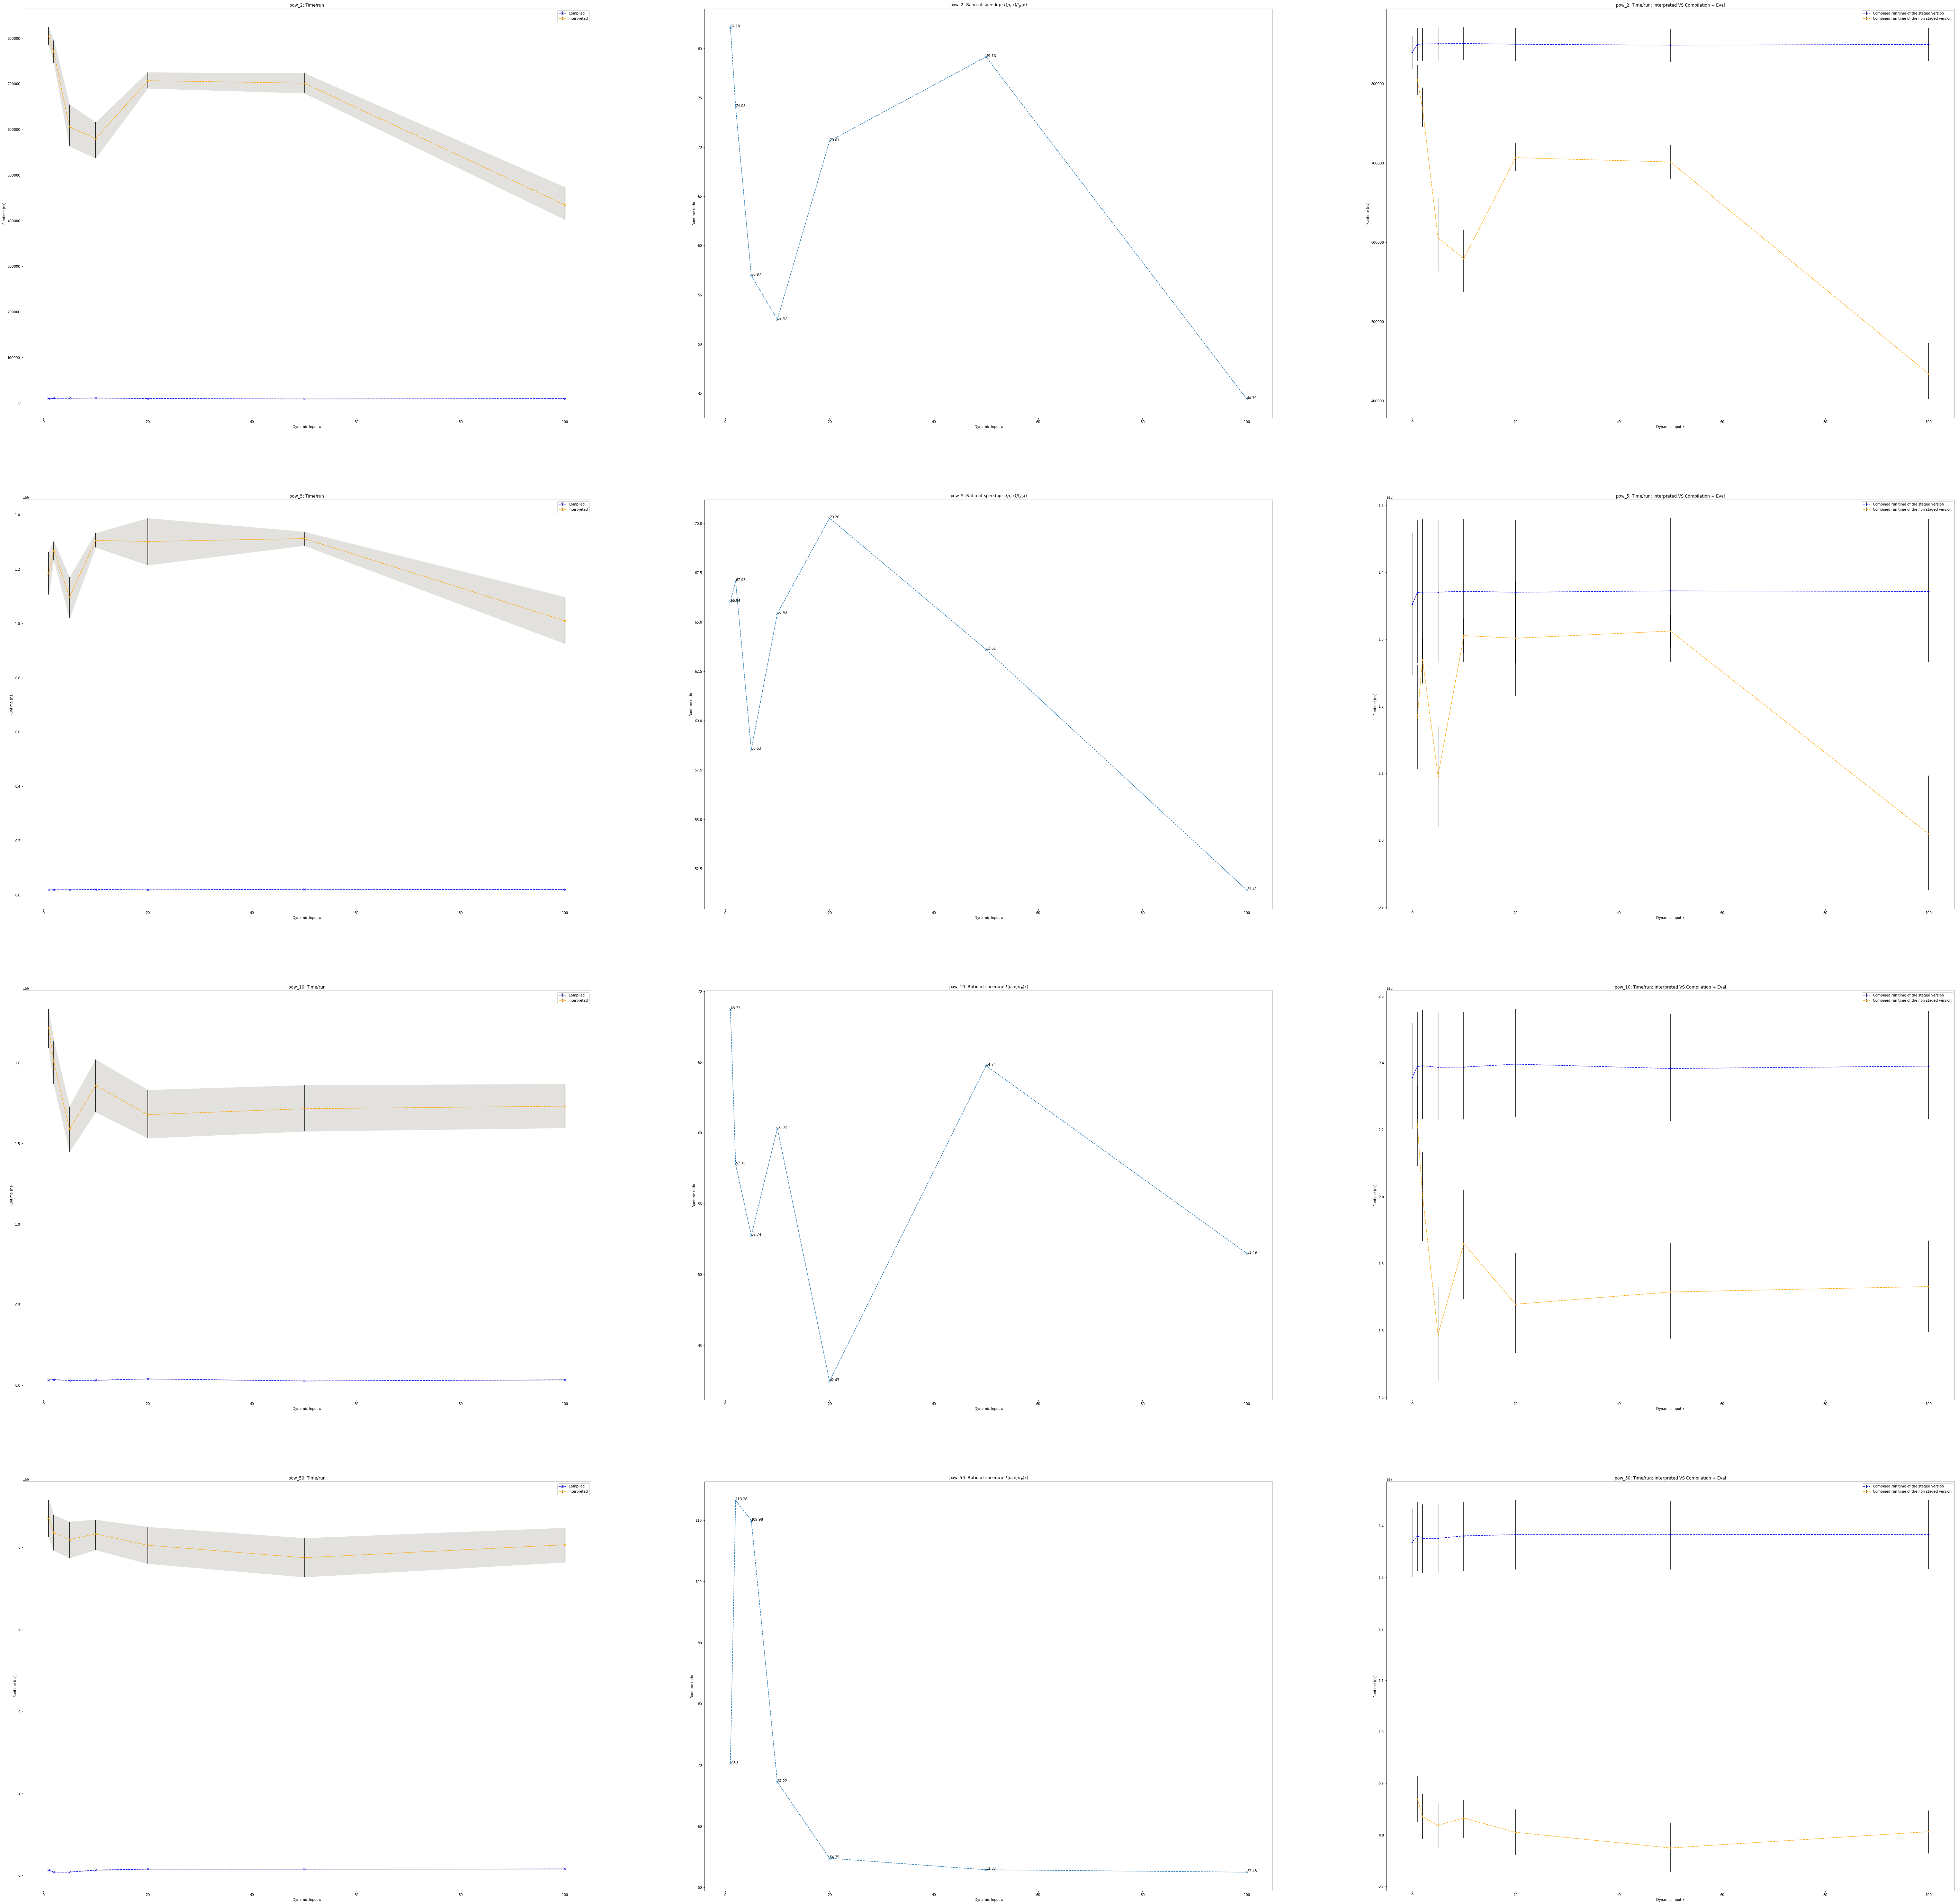

In [199]:
fig, axs = plt.subplots(len(bench_ns), 3, figsize=(100, 100))
for row, n in zip(axs, bench_ns):
    df_pow_n = df_pow[df_pow["benchmark_name"].str.startswith(f"pow_{n}_")]
    df_pow_n["bench_x"] = bench_xs
    plot_info_for_axs(df=df_pow_n, title=f"pow_{n}", axs=row, linreg=False)
plt.show()

## Interpretation:

Inconclusive results, need more data.

# Convolution

In [73]:
df_conv = df[df['benchmark_name'].str.startswith("conv")]


In [105]:
df_conv

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mGC_per_run_abs_lo_diff,mGC_per_run_abs_hi_diff,mjGC_per_run_r2,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff
82,conv_200_200_staged,0.949879,2.295589e+08,-1.014705e+07,1.002495e+07,1.0,48488232.0,-5.960464e-08,1.043081e-07,1.000000,...,-0.010214,0.010144,0.999844,8.654666,-0.021658,0.019399,NaN,0.000000,0.000000,0.000000
83,conv_200_compile,0.998628,2.515700e+09,-1.564704e+07,1.577977e+07,1.0,531460071.0,-7.748604e-07,1.013279e-06,1.000000,...,-0.020491,0.021982,0.999989,79.662945,-0.042849,0.044129,0.999871,0.999966,-0.000087,0.000034
84,conv_200_200_run,0.998804,4.382037e+09,-2.253114e+07,2.811023e+07,1.0,865622685.0,-1.311302e-06,1.549721e-06,1.000000,...,-0.055905,0.057909,0.999970,96.099932,-0.092840,0.086989,0.999871,0.999966,-0.000094,0.000034
85,conv_100_100_staged,0.837945,5.358673e+07,-4.694504e+06,4.576325e+06,1.0,12385681.0,-1.862645e-08,2.421439e-08,1.000000,...,-0.005454,0.004996,0.999795,3.353953,-0.008149,0.008349,NaN,0.000000,0.000000,0.000000
86,conv_100_compile,0.987757,6.110224e+08,-1.084147e+07,1.081419e+07,1.0,146926707.0,-1.490116e-07,3.576279e-07,1.000000,...,-0.020418,0.018147,0.999932,28.603868,-0.043458,0.038956,0.094692,0.008653,-0.005636,0.006280
87,conv_100_100_run,0.995483,1.053280e+09,-1.190104e+07,1.181050e+07,1.0,223821600.0,-3.576279e-07,4.172325e-07,1.000000,...,-0.052507,0.046410,0.999831,46.712148,-0.115113,0.104075,0.995657,0.957889,-0.011473,0.011007
88,conv_50_50_staged,0.784183,1.350366e+07,-1.439523e+06,1.334126e+06,1.0,3229215.0,-5.122274e-09,5.587935e-09,0.999999,...,-0.004722,0.005083,0.999483,1.000068,-0.002103,0.002102,NaN,0.000000,0.000000,0.000000
89,conv_50_compile,0.942705,1.730475e+08,-7.820424e+06,7.730799e+06,1.0,43826601.0,-5.960464e-08,8.940697e-08,1.000000,...,-0.014617,0.013432,0.999810,10.862097,-0.027802,0.026600,NaN,0.000000,0.000000,0.000000
90,conv_50_50_run,0.950882,2.444883e+08,-9.717991e+06,9.093417e+06,1.0,59711390.0,-8.195639e-08,1.192093e-07,1.000000,...,-0.015130,0.014248,0.999849,15.203529,-0.025848,0.023577,NaN,0.000000,0.000000,0.000000
91,conv_20_20_staged,0.894650,2.629926e+06,-1.766991e+05,1.865368e+05,1.0,581579.0,-9.313226e-10,1.047738e-09,0.999969,...,-0.006794,0.007208,0.970763,0.197523,-0.005568,0.005595,NaN,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Conv: Time/run')

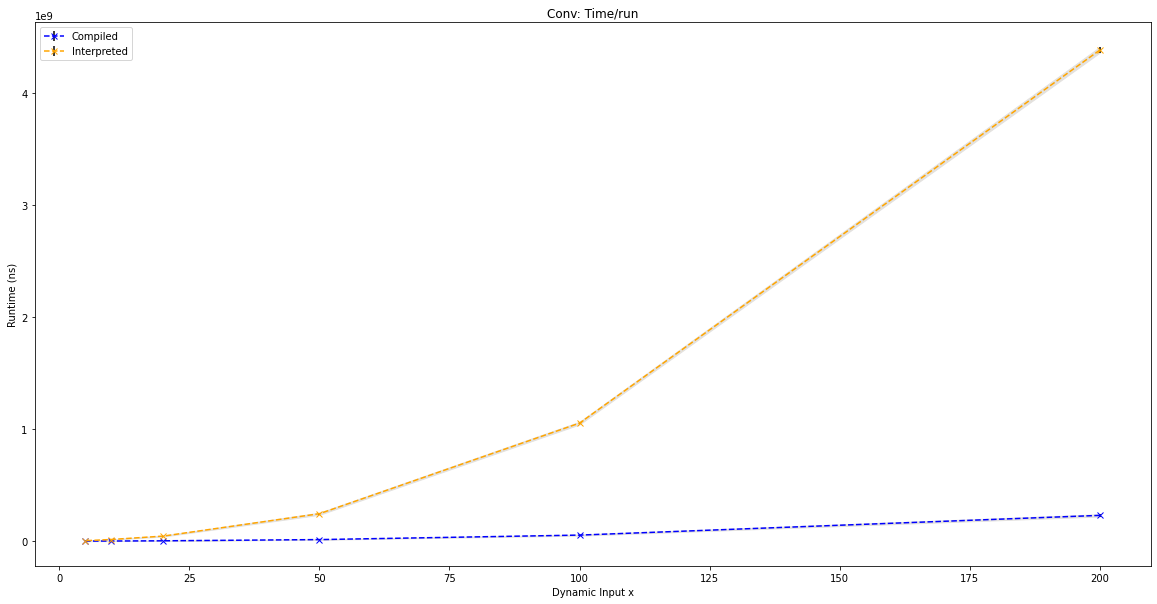

In [88]:
staged = df_conv[df_conv['benchmark_name'].str.endswith('staged')][['benchmark_name', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
staged['bench_x'] = [200, 100, 50, 20, 10, 5]
run = df_conv[df_conv['benchmark_name'].str.endswith('run')][['benchmark_name', 'time_per_run_mean', 'time_per_run_abs_lo_diff', 'time_per_run_abs_hi_diff']]
run['bench_x'] = [200, 100, 50, 20, 10, 5]
fig, axs = plt.subplots(1, 1, figsize=(20, 10))
plot_one(axs, staged, "blue", "black", "#e3e1de", "Compiled")
plot_one(axs, run, "orange", "black", "#e3e1de", "Interpreted")
axs.legend()
axs.set_xlabel("Dynamic Input x")
axs.set_ylabel("Runtime (ns)")
# plt.plot(x, y, 'x--', color='blue', label="time/run for staged fib")
axs.set_title("Conv: Time/run")


,benchmark_name,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,bench_x
84,conv_200_200_run,4.382037e+09,-2.253114e+07,2.811023e+07,200
87,conv_100_100_run,1.053280e+09,-1.190104e+07,1.181050e+07,100
90,conv_50_50_run,2.444883e+08,-9.717991e+06,9.093417e+06,50
93,conv_20_20_run,4.476760e+07,-3.930880e+06,3.949972e+06,20
96,conv_10_10_run,1.428724e+07,-1.642021e+06,1.653460e+06,10
99,conv_5_5_run,3.792847e+06,-4.509124e+05,4.976457e+05,5


[18.10533004662516, 19.655607441933824, 19.08894421573028, 18.10533004662516, 19.655607441933824, 19.08894421573028]


/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Text(0.5, 1.0, 'Convolution: ratio of run time of non-staged wrt staged.')

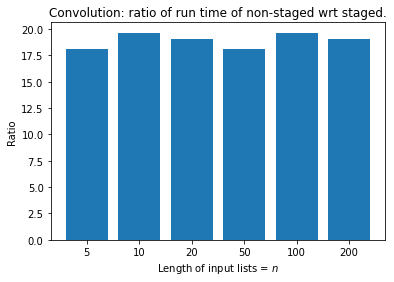

In [104]:
values = []
ns = [5, 10, 20, 50, 100, 200]
for i in ns:
    staged = df_conv[df_conv['benchmark_name'].str.startswith(f'conv_{i}')][df_conv['benchmark_name'].str.endswith('staged')]['time_per_run_mean'].iloc[0]
    run = df_conv[df_conv['benchmark_name'].str.startswith(f'conv_{i}')][df_conv['benchmark_name'].str.endswith('run')]['time_per_run_mean'].iloc[0]
    values.append(run/staged)
print(values)
fig, ax = plt.subplots(1, 1)
ax.bar(([str(i) for i in ns]), values)
ax.set_xlabel("Length of input lists = $n$")
ax.set_ylabel("Ratio")
ax.set_title("Convolution: ratio of run time of non-staged wrt staged.")

In [ ]:
df_pow = df[df['benchmark_name'].str.startswith("pow")]


## Interpretation

It's pretty surprising that the estimated ratio here for any length $n$ is constant, given that this ratio depends on both static and dynamic input.

Or is it? 

If we think about it, the complexity of the algorithm has always been $O(n)$ where $n$ is the length of both input lists, so is bounded by $kn$ for some $k$, and our algorithm doesn't actually change the complexity, but rather significantly lowers it down, so it is to be expected that wrt, the linear speedup is constant.


# Regular Expressions (or Regexp)

In [108]:
df_regexp = df[df['benchmark_name'].str.startswith("regexp")]

In [144]:
lengths = [3, 6, 6, 5, 1, 0]
exprs = [ "111", "0abaab", "0abab0", "0abba", "0", "" ]
regexps = ["((12)|$\epsilon$)3", "(1|2)34", "0(a*b)*", "1**"]

In [173]:
dfs_regexp = [None] * len(regexps)
for i in range(len(regexps)):
    dfs_regexp[i] = df_regexp[df_regexp['benchmark_name'].str.startswith(f"regexp_{i}")]
    dfs_regexp[i]["regexp"] = regexps[i]
    # add bench_x
    for j in range(len(exprs)):
        dfs_regexp[i].loc[dfs_regexp[i]['benchmark_name'].str.match(f"regexp_(.*)_{j}_(.*)"), ['bench_x']] = lengths[j]
        dfs_regexp[i].loc[dfs_regexp[i]['benchmark_name'].str.match(f"regexp_(.*)_{j}_(.*)"), ['str_to_match']] = exprs[j]
    dfs_regexp[i].loc[dfs_regexp[i]['benchmark_name'].str.match("regexp_(.*)_compile"), ["bench_x"]] = 0
    dfs_regexp[i] = dfs_regexp[i].sort_values(by="bench_x")

/home/milkfans/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/milkfans/.local/lib/python3.6/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/milkfans/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [202]:
dfs_regexp[2]

,benchmark_name,time_per_run_r2,time_per_run_mean,time_per_run_abs_lo_diff,time_per_run_abs_hi_diff,mWd_per_run_r2,mWd_per_run_mean,mWd_per_run_abs_lo_diff,mWd_per_run_abs_hi_diff,mjWd_per_run_r2,...,mjGC_per_run_mean,mjGC_per_run_abs_lo_diff,mjGC_per_run_abs_hi_diff,compactions_per_run_r2,compactions_per_run_mean,compactions_per_run_abs_lo_diff,compactions_per_run_abs_hi_diff,regexp,bench_x,str_to_match
43,regexp_2_5_staged,0.602623,1.281121e+04,-1.562694e+03,2.119104e+03,1.0,5.413000e+03,-2.728484e-12,1.364242e-11,0.070277,...,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0(a*b)*,0.0,
49,regexp_2_compile,0.944469,4.692461e+07,-3.256904e+06,2.630884e+06,1.0,1.210816e+07,-1.862645e-09,3.352761e-08,1.000000,...,1.646304,-0.018126,0.019735,NaN,0.0,0.0,0.0,0(a*b)*,0.0,NaN
50,regexp_2_5_run,0.960422,3.164447e+07,-1.639478e+06,1.705094e+06,1.0,7.938004e+06,-4.656613e-09,1.955777e-08,0.999996,...,1.092996,-0.019937,0.017416,NaN,0.0,0.0,0.0,0(a*b)*,0.0,
44,regexp_2_4_staged,0.957323,2.019865e+06,-1.372059e+05,1.230226e+05,1.0,5.208370e+05,-1.746230e-10,1.338776e-09,0.999996,...,0.076265,-0.018162,0.019817,NaN,0.0,0.0,0.0,0(a*b)*,1.0,0
51,regexp_2_4_run,0.825711,1.260182e+08,-1.848564e+07,1.440483e+07,1.0,3.308803e+07,-2.235174e-08,7.078052e-08,0.999999,...,5.506226,-0.034385,0.033504,NaN,0.0,0.0,0.0,0(a*b)*,1.0,0
48,regexp_2_0_staged,0.924029,1.173341e+04,-7.489862e+02,9.157680e+02,1.0,9.253000e+03,-1.818989e-12,2.546585e-11,0.244981,...,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0(a*b)*,3.0,111
55,regexp_2_0_run,0.967704,6.747085e+08,-3.022672e+07,3.296624e+07,1.0,1.731005e+08,-2.980232e-08,4.768372e-07,1.000000,...,28.143191,-0.061684,0.065053,NaN,0.0,0.0,0.0,0(a*b)*,3.0,111
45,regexp_2_3_staged,0.914769,2.247793e+07,-1.842376e+06,1.773569e+06,1.0,5.315380e+06,-2.793968e-09,1.303852e-08,1.000000,...,0.805058,-0.012709,0.014104,NaN,0.0,0.0,0.0,0(a*b)*,5.0,0abba
52,regexp_2_3_run,0.932198,3.151122e+09,-1.916728e+08,3.032799e+08,1.0,7.331513e+08,-3.576279e-07,1.788139e-06,1.000000,...,106.062646,-0.193612,0.201401,NaN,0.0,0.0,0.0,0(a*b)*,5.0,0abba
46,regexp_2_2_staged,0.469689,1.395276e+07,-1.066606e+06,1.985282e+06,1.0,5.326138e+06,-2.793968e-09,1.303852e-08,1.000000,...,0.821790,-0.015761,0.017430,NaN,0.0,0.0,0.0,0(a*b)*,6.0,0abab0


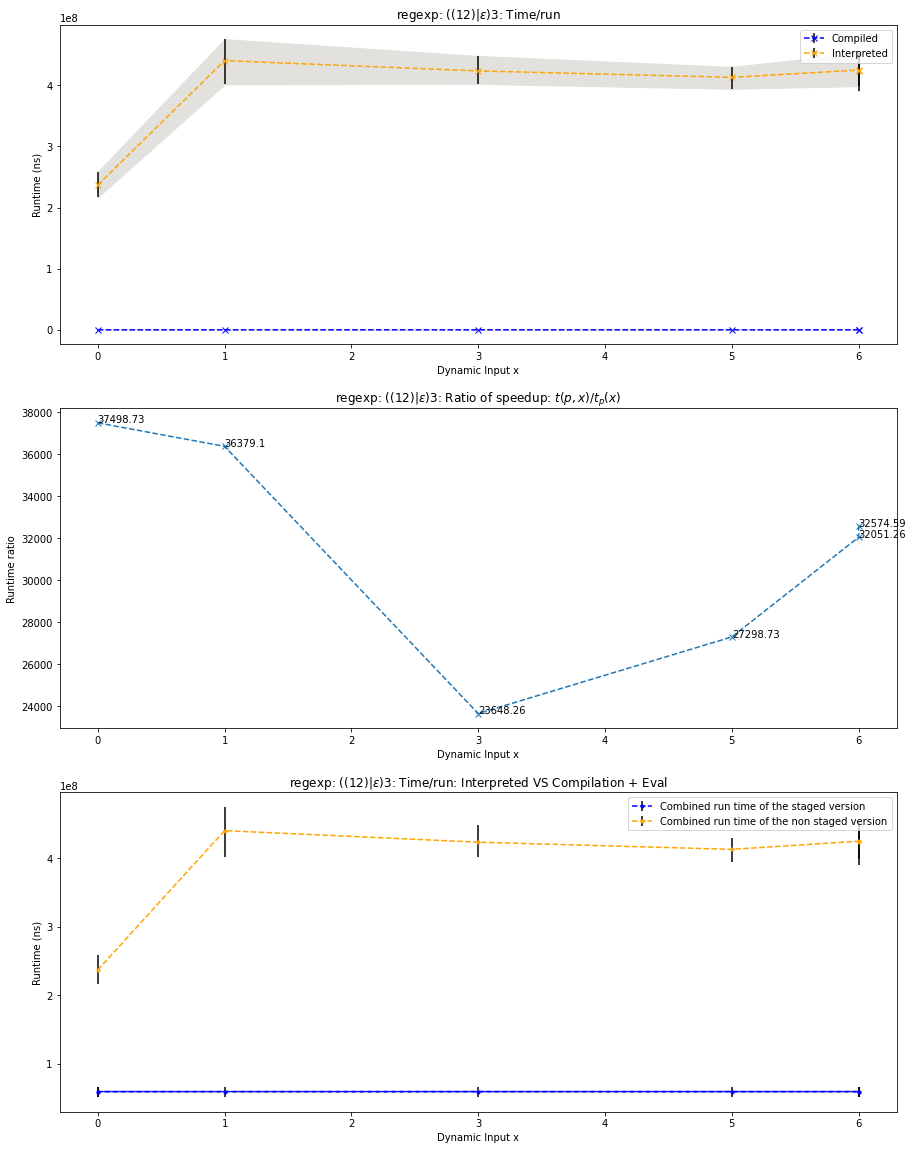

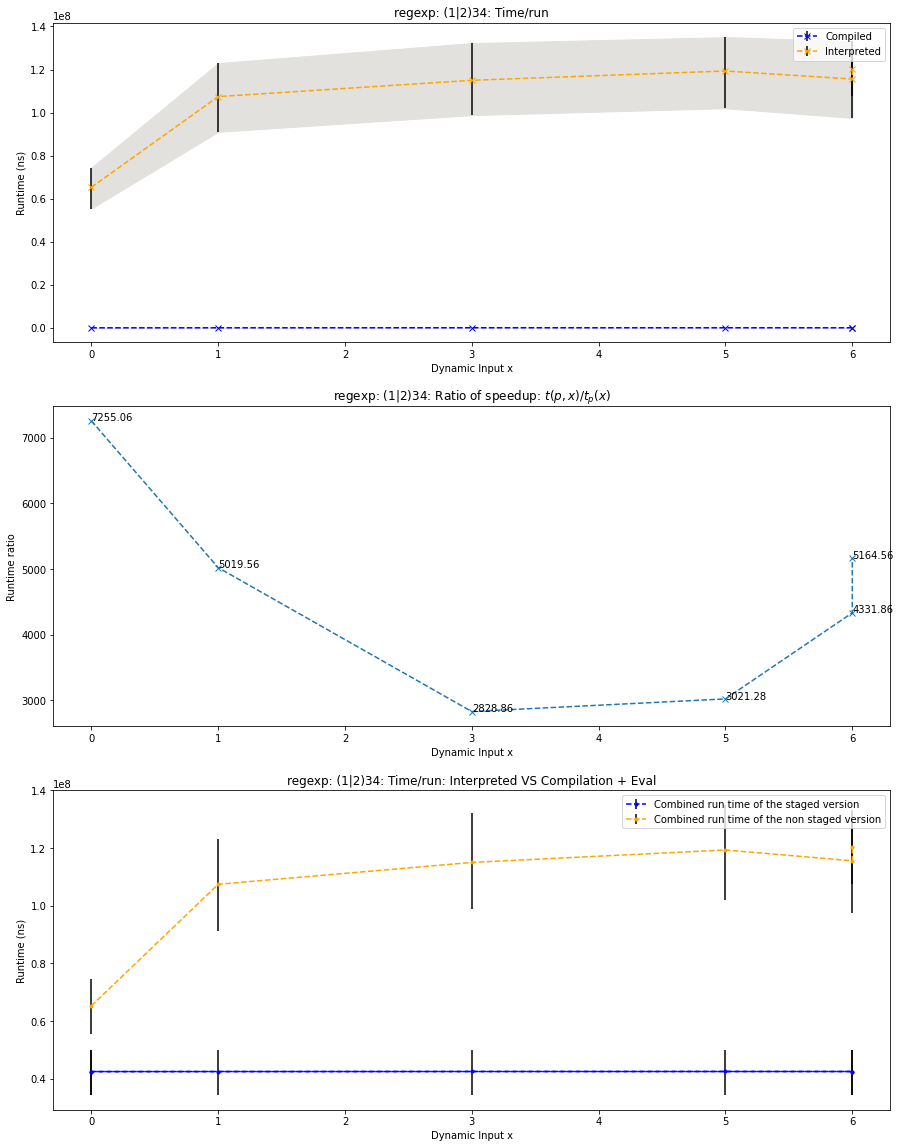

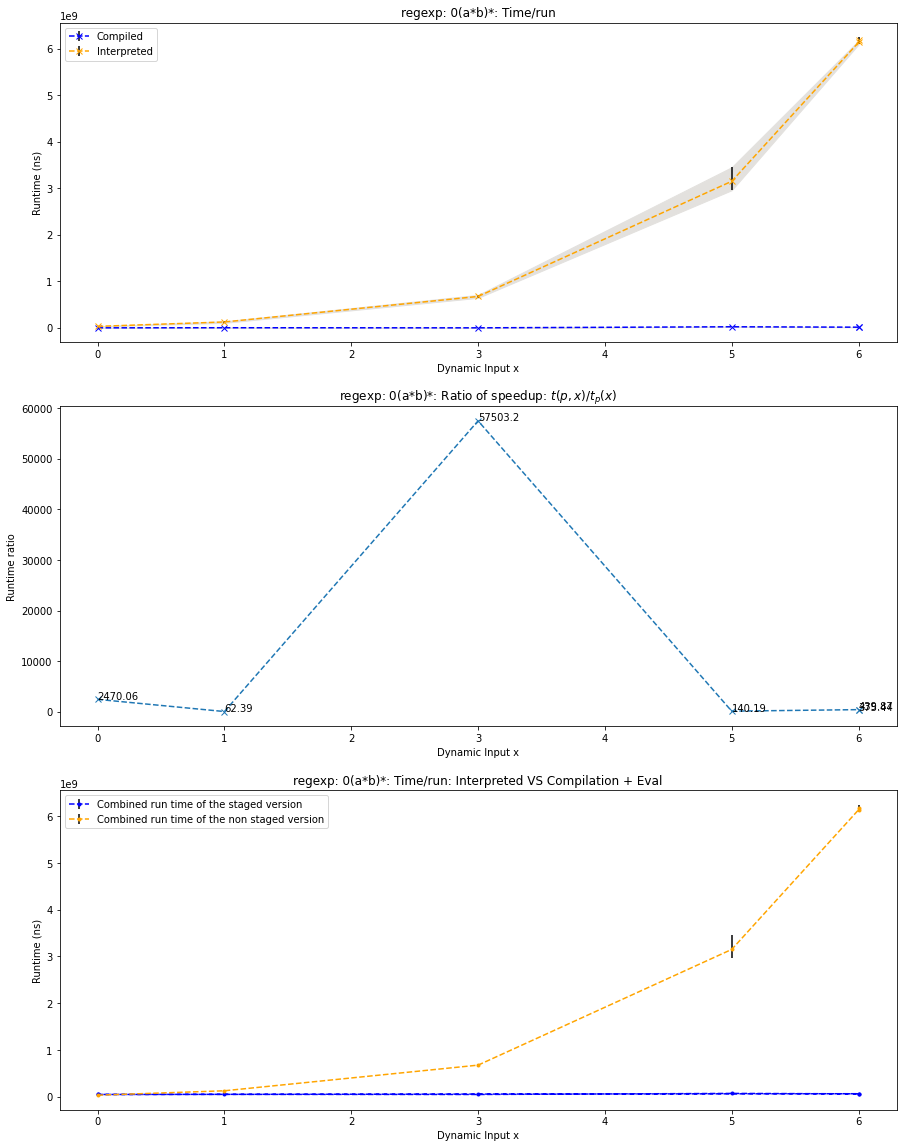

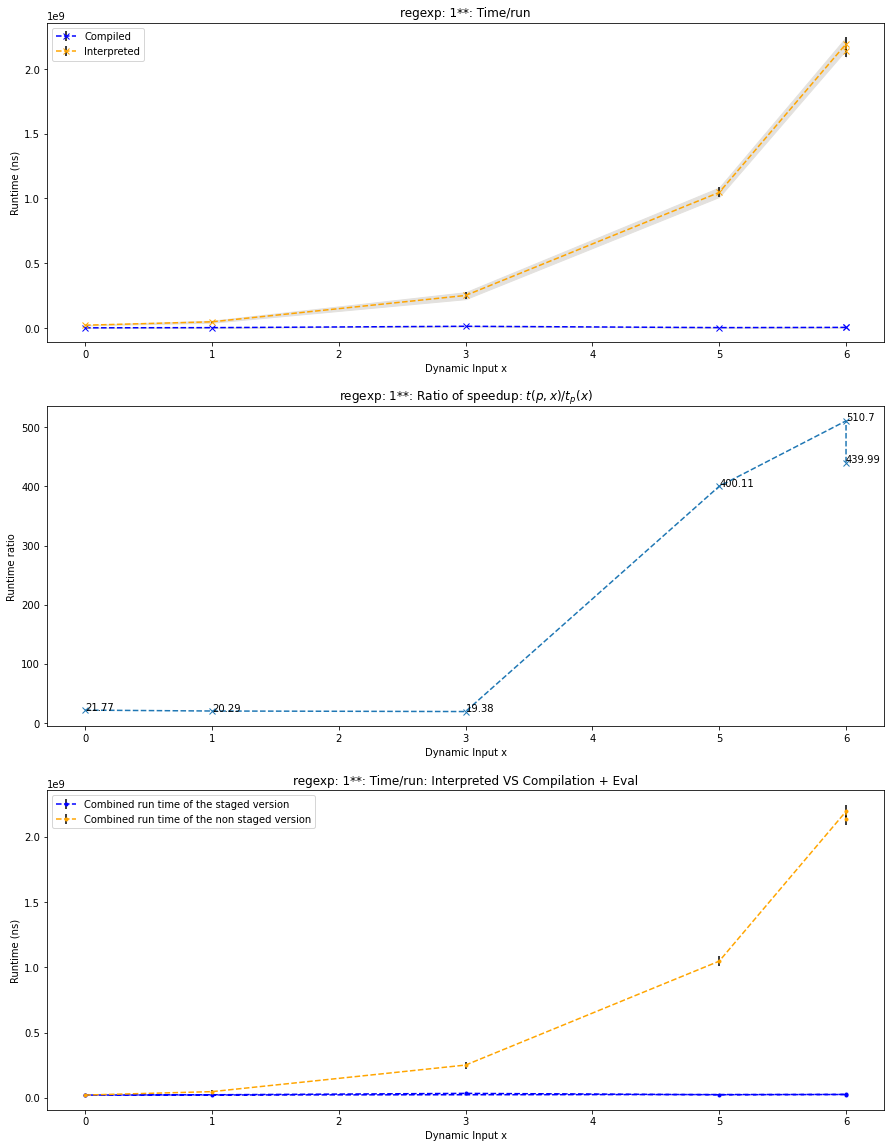

In [209]:
for i in range(len(regexps)):
    plot_info_for(dfs_regexp[i], f"regexp: {regexps[i]}", linreg=False)

# Interpretation

For now there doesn't seem like the ratio of speedup has converged in any way. 

I should probably only focus on either inputs which match or inputs which don't match, because they take different routes in the matcher. 

# New Experiments needed

- Pow: 
    - Bigger, exponentially growing numbers and more numbers.
    - Try the mapping thing: Map a pow 50 thing on a growing list of numbers
- Regexp
    - Bigger expressions to run program on.
    - Let me choose just the one big expression
    - Try the mapping thing too because makes sense to do so (e.g. compiling queries) although should give same as big string.s